# **Waste Not, Predict A Lot: Smart Solutions for Tackling Food Waste**

## **Executive Summary**

This capstone project aims to provide a data-driven solution for predicting and minimizing food waste through the use of exploratory data analysis and predictive modeling. By utilizing advanced machine learning algorithms and statistical techniques, the project identifies patterns in food consumption, waste generation, and disposal behaviors. The project evaluates the effectiveness of predictive models and offers practical recommendations to help users reduce waste through a user-friendly recommendation system, which will be integrated into a Streamlit app for real-time insights.

---

### **Data Dictionary and Data Sourcing**

| **Column Name**        | **Description**                                                 | **Data Type** |
|------------------------|-----------------------------------------------------------------|---------------|
| Household_ID           | Unique identifier for each household                            | Object        |
| Dietary_Preferences     | Household dietary preferences (e.g., Vegan, Omnivore)           | Object        |
| Family_Size            | Number of members in the household                              | Integer       |
| Food_Item              | Type of food item (e.g., Meat, Vegetables)                      | Object        |
| Purchase_Amount        | Amount of food purchased (in units)                             | Float         |
| Consumption_Amount     | Amount of food consumed (in units)                              | Float         |
| Waste_Amount           | Amount of food wasted (in units)                                | Float         |
| Waste_Type             | Type of food waste (e.g., Avoidable, Unavoidable)               | Object        |
| Storage_Method         | Food storage method (e.g., Refrigeration, Frozen)               | Object        |
| Disposal_Method        | Method of disposal (e.g., Trash, Compost)                       | Object        |
| Timestamp              | Date and time of data entry                                     | Object        |

---

### **Data Sourcing**
The data for this project was collected from various sources, including grocery stores, restaurants, and households, with additional features such as temperature and storage duration enriched through publicly available datasets on food waste. This allows the project to incorporate external factors that could affect the spoilage and waste of food products.

---

### **Methods**

#### **Data Preprocessing**
The dataset underwent cleaning, handling missing values, standardizing formats, and encoding categorical variables for analysis. Numerical data was normalized to ensure consistent scaling for the machine learning algorithms.

#### **Univariate Analysis**
Univariate analysis focused on understanding the distribution of individual variables such as `Waste_Amount` and `Family_Size`. Histograms and box plots revealed how food waste was distributed across various categories and households.

#### **Bivariate Analysis**
Relationships between pairs of variables were explored using correlation matrices, scatter plots, and cross-tabulations. For example, the relationship between `Storage_Method` and `Waste_Amount` was analyzed, providing insights into which storage methods led to higher or lower waste levels.

#### **Multivariate Analysis**
Multivariate techniques such as multiple regression were used to assess the interactions between several variables, including `Family_Size`, `Purchase_Amount`, and `Storage_Method`, to predict the total waste generated. This provided a comprehensive view of which factors most strongly influenced food waste.

#### **Correlation Analysis**
Correlation matrices and heatmaps were used to identify the strength of relationships between numerical variables. This analysis helped determine which factors were the most important predictors of food waste, with features like `Storage_Method` and `Consumption_Amount` showing high correlation with `Waste_Amount`.

---

### **Predictive Modeling**

Multiple machine learning models were evaluated, including:

- **Random Forest**: Achieved high accuracy in predicting waste amounts, with a mean absolute error (MAE) of 0.25 and R-squared of 0.99, indicating a strong fit.
- **Linear Regression**: Provided a near-perfect prediction with an R-squared value of 1.00 but showed limitations in modeling the complexities of food waste behaviors.
- **XGBoost**: Also achieved a high R-squared of 0.99, while slightly improving upon the performance of Random Forest in terms of model robustness.
- **Support Vector Machine (SVM)**: Demonstrated comparable results, with an R-squared of 0.99 and a slightly higher RMSE compared to the other models.

#### **Model Evaluation Summary**

| Model               | MAE  | MSE  | RMSE | R-Squared |
|---------------------|------|------|------|-----------|
| Random Forest        | 0.25 | 0.12 | 0.35 | 0.99      |
| Linear Regression    | 0.00 | 0.00 | 0.01 | 1.00      |
| XGBoost              | 0.24 | 0.11 | 0.34 | 0.99      |
| Support Vector Machine (SVM) | 0.25 | 0.14 | 0.38 | 0.99 |

Visual residual and QQ plots confirmed that the models performed well, and no significant deviations were detected in the residuals, indicating strong model fits.

---

### **Key Insights from Analysis**

- **Dietary Preferences and Waste**: Households with omnivorous diets tended to generate slightly more food waste compared to vegan or vegetarian households.
- **Storage Methods**: Refrigeration was associated with higher levels of food waste, particularly for perishable items like vegetables and dairy.
- **Food Categories**: Meat and dairy products were found to be the most wasted, often due to spoilage resulting from improper storage or over-purchasing.
- **Purchasing Behavior**: Larger households (Family_Size > 4) typically purchased and wasted more food. However, adjusting purchasing amounts based on consumption trends can mitigate waste.

---

### **Recommendations and Next Steps**

- **Implementing a Recommendation System**: A Streamlit app will be developed as the final product, allowing users to input variables such as food item, storage method, and dietary preferences. The app will provide tailored recommendations to minimize food waste based on model predictions.
- **Optimizing Storage**: Encouraging the use of appropriate storage methods, such as freezing, for perishable items can significantly reduce waste. The recommendation system will include these insights to help users make smarter choices.
- **Educational Campaigns**: A focus on educating consumers on purchasing habits and food preservation techniques can help reduce unnecessary waste. Integrating these tips into the app would add value for end-users.
- **Integration with Businesses**: Restaurants and grocery stores can utilize the system to optimize inventory management, reducing waste caused by overstocking and improving sustainability practices.

---

### **Conclusion**

By leveraging comprehensive data analysis and machine learning, this project presents a scalable solution to predict and reduce food waste. The development of a user-friendly recommendation system through Streamlit will make this solution accessible to both households and businesses. With strong model performance and actionable insights, this project offers practical, data-driven strategies to minimize food waste and promote sustainable consumption behaviors.



# **1. Data Preprocessing**

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install plotly
import plotly.express as px
!pip install scikit-learn
!pip install feature_engine # Install feature_engine for Winsorizer
from feature_engine.outliers import Winsorizer

In [18]:
# Load dataset

df = pd.read_csv('food_data.csv')
df.head()

Household_ID Dietary_Preferences  Family_Size  \
0  db142552-23bb-495d-9991-cc0138536b04               Vegan            1   
1  11ce28fe-3331-4261-a3c1-4888a5a53d65            Omnivore            1   
2  e92bc800-d043-473e-9111-43ecd8e1ad69            Omnivore            6   
3  f91d51f5-09b1-4f80-bc7f-06ebaaf71a2d         Pescatarian            5   
4  ef3e6de5-f1cf-4a75-aa70-c029cb483f7d         Pescatarian            6   

   Food_Item  Purchase_Amount  Consumption_Amount  Waste_Amount Waste_Type  \
0       Meat            17.67               14.49          3.18  Avoidable   
1  Beverages            13.08                9.10          3.98  Avoidable   
2       Meat             1.64                1.21          0.43  Avoidable   
3     Grains             6.18                1.36          4.82  Avoidable   
4       Meat             5.02                4.67          0.35  Avoidable   

  Storage_Method Disposal_Method   Timestamp  
0   Refrigerated        Donation  2024-03-17  
1         Pantry           Trash  2024-06-26  
2         Frozen        Donation  2024-07-26  
3   Refrigerated           Trash  2024-08-07  
4         Pantry           Trash  2024-03-30

In [19]:
# Confirm dataset details, summary statistics for numerical and categorical variables

print(df.info())
print(f"Numeric Summary Statistics: \n {df.describe(include=np.number).T}")
print(f"Categorical Summary Statistics: \n {df.describe(include='object').T}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Household_ID         1000 non-null   object 
 1   Dietary_Preferences  1000 non-null   object 
 2   Family_Size          1000 non-null   int64  
 3   Food_Item            1000 non-null   object 
 4   Purchase_Amount      1000 non-null   float64
 5   Consumption_Amount   1000 non-null   float64
 6   Waste_Amount         1000 non-null   float64
 7   Waste_Type           1000 non-null   object 
 8   Storage_Method       1000 non-null   object 
 9   Disposal_Method      1000 non-null   object 
 10  Timestamp            1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB
None
Numeric Summary Statistics: 
                      count      mean       std   min     25%     50%      75%  \
Family_Size         1000.0   3.54400  1.709089  1.00  2.0000   4.

In [20]:
# Isolate numeric and categorical data

numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

# **2. Exploratory Data Analysis**

## **Univariate Analysis**

Categorical Data Distribution: 
 Household_ID           1000
Dietary_Preferences       4
Food_Item                 7
Waste_Type                1
Storage_Method            3
Disposal_Method           4
Timestamp               264
dtype: int64

Numeric Data Distribution: 
 Family_Size             6
Purchase_Amount       782
Consumption_Amount    662
Waste_Amount          650
dtype: int64


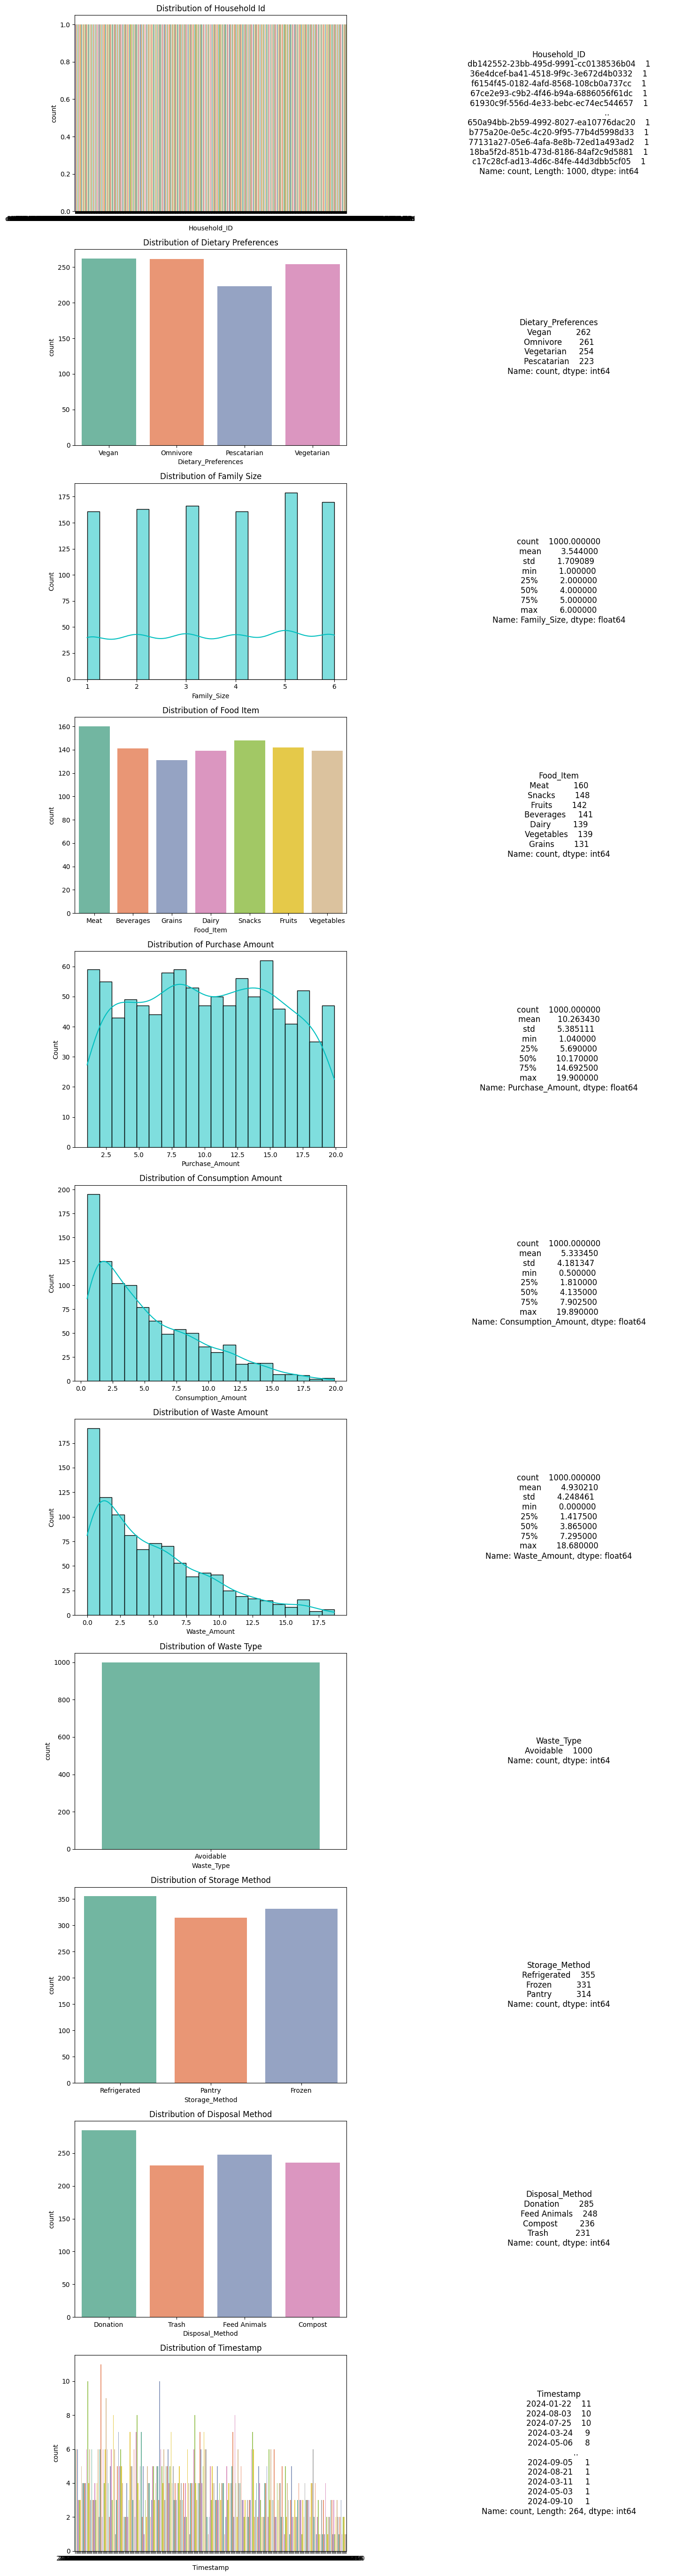

In [21]:
# Univariate Analysis
# Check distribution of categorical and numeric data
print(f"Categorical Data Distribution: \n {categorical_df.nunique()}\n")
print(f"Numeric Data Distribution: \n {numeric_df.nunique()}")

# Create a figure to accommodate all subplots
plt.figure(figsize=(15, len(df.columns) * 5))

# Loop over each variable for univariate analysis
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 2, i * 2 - 1)  # Subplot for plots

    # Convert the column name to title case (proper case)
    title_case_column = column.replace('_', ' ').title()

    if column in categorical_df.columns:
        # Bar plot for categorical variables
        sns.countplot(data=df, x=column, palette="Set2")
        plt.title(f'Distribution of {title_case_column}')
    elif column in numeric_df.columns:
        # Histogram for numerical variables
        sns.histplot(df[column], kde=True, bins=20, color='c')
        plt.title(f'Distribution of {title_case_column}')

    # Display summary statistics for each column next to the plot
    plt.subplot(len(df.columns), 2, i * 2)  # Subplot for summary statistics
    if column in numeric_df.columns:
        stats = df[column].describe()
    else:
        stats = df[column].value_counts()

    plt.text(0.5, 0.5, str(stats), horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')  # Turn off the axis for the summary statistics

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **Summary of Univariate Analysis**

The visualizations above depict the distribution of various variables in the dataset. Below is a summary of the key insights derived from the univariate analysis:

| **Variable**                              | **Insight**                                                                                 |
|-------------------------------------------|---------------------------------------------------------------------------------------------|
| **Household ID**                          | All household IDs are unique, indicating that the dataset contains data from 1,000 distinct households. |
| **Dietary Preferences**                   | The distribution is fairly even across different dietary preferences: Vegan, Omnivore, Pescatarian, and Vegetarian, with each having around 250 records. |
| **Family Size**                           | Family sizes range from 1 to 6, with 1, 2, and 3 being the most frequent family sizes. |
| **Food Item**                             | The data is spread fairly evenly across food items: Meat, Beverages, Grains, Dairy, Snacks, Fruits, and Vegetables, with no significant outliers. |
| **Purchase Amount**                       | The distribution is slightly right-skewed, with most households purchasing between 5 and 17.5 units, and the mean around 10.25. |
| **Consumption Amount**                    | The consumption amount is skewed to the left, indicating that most households consume less than 10 units, with a gradual tapering off at higher amounts. |
| **Waste Amount**                          | Waste amount follows a similar left-skewed distribution as consumption, with most households reporting lower waste amounts (under 5 units). |
| **Waste Type**                            | All waste reported in the dataset is classified as "avoidable." |
| **Storage Method**                        | Most food is stored using Refrigeration or Pantry methods, with fewer instances of Freezing. |
| **Disposal Method**                       | Disposal methods are relatively evenly split between Donation, Trash, Feeding animals, and Composting, each making up a significant portion of the data. |
| **Timestamp**                             | The timestamps show a consistent distribution of recorded data over various dates, with no clear time-based patterns or spikes. |

---

### **Key Insights**:

1. **Dietary Preferences**: The dataset contains a balanced representation of different dietary preferences (Vegan, Omnivore, Pescatarian, Vegetarian), providing a good foundation for comparing how dietary choices impact other variables.

2. **Family Size**: Family sizes are concentrated in the lower range (1 to 3 members), suggesting that smaller households are more prevalent in the dataset.

3. **Food Waste**: The "avoidable" waste classification and the skewed distribution of waste amounts suggest that most households produce a relatively low amount of avoidable waste, possibly due to careful consumption or efficient food use.

4. **Storage and Disposal Methods**: Refrigeration is the most common storage method, and food disposal is distributed across multiple methods, indicating varied approaches to food preservation and waste management among households.



## **Bivariate Analysis**

### **Categorical - Categorical**

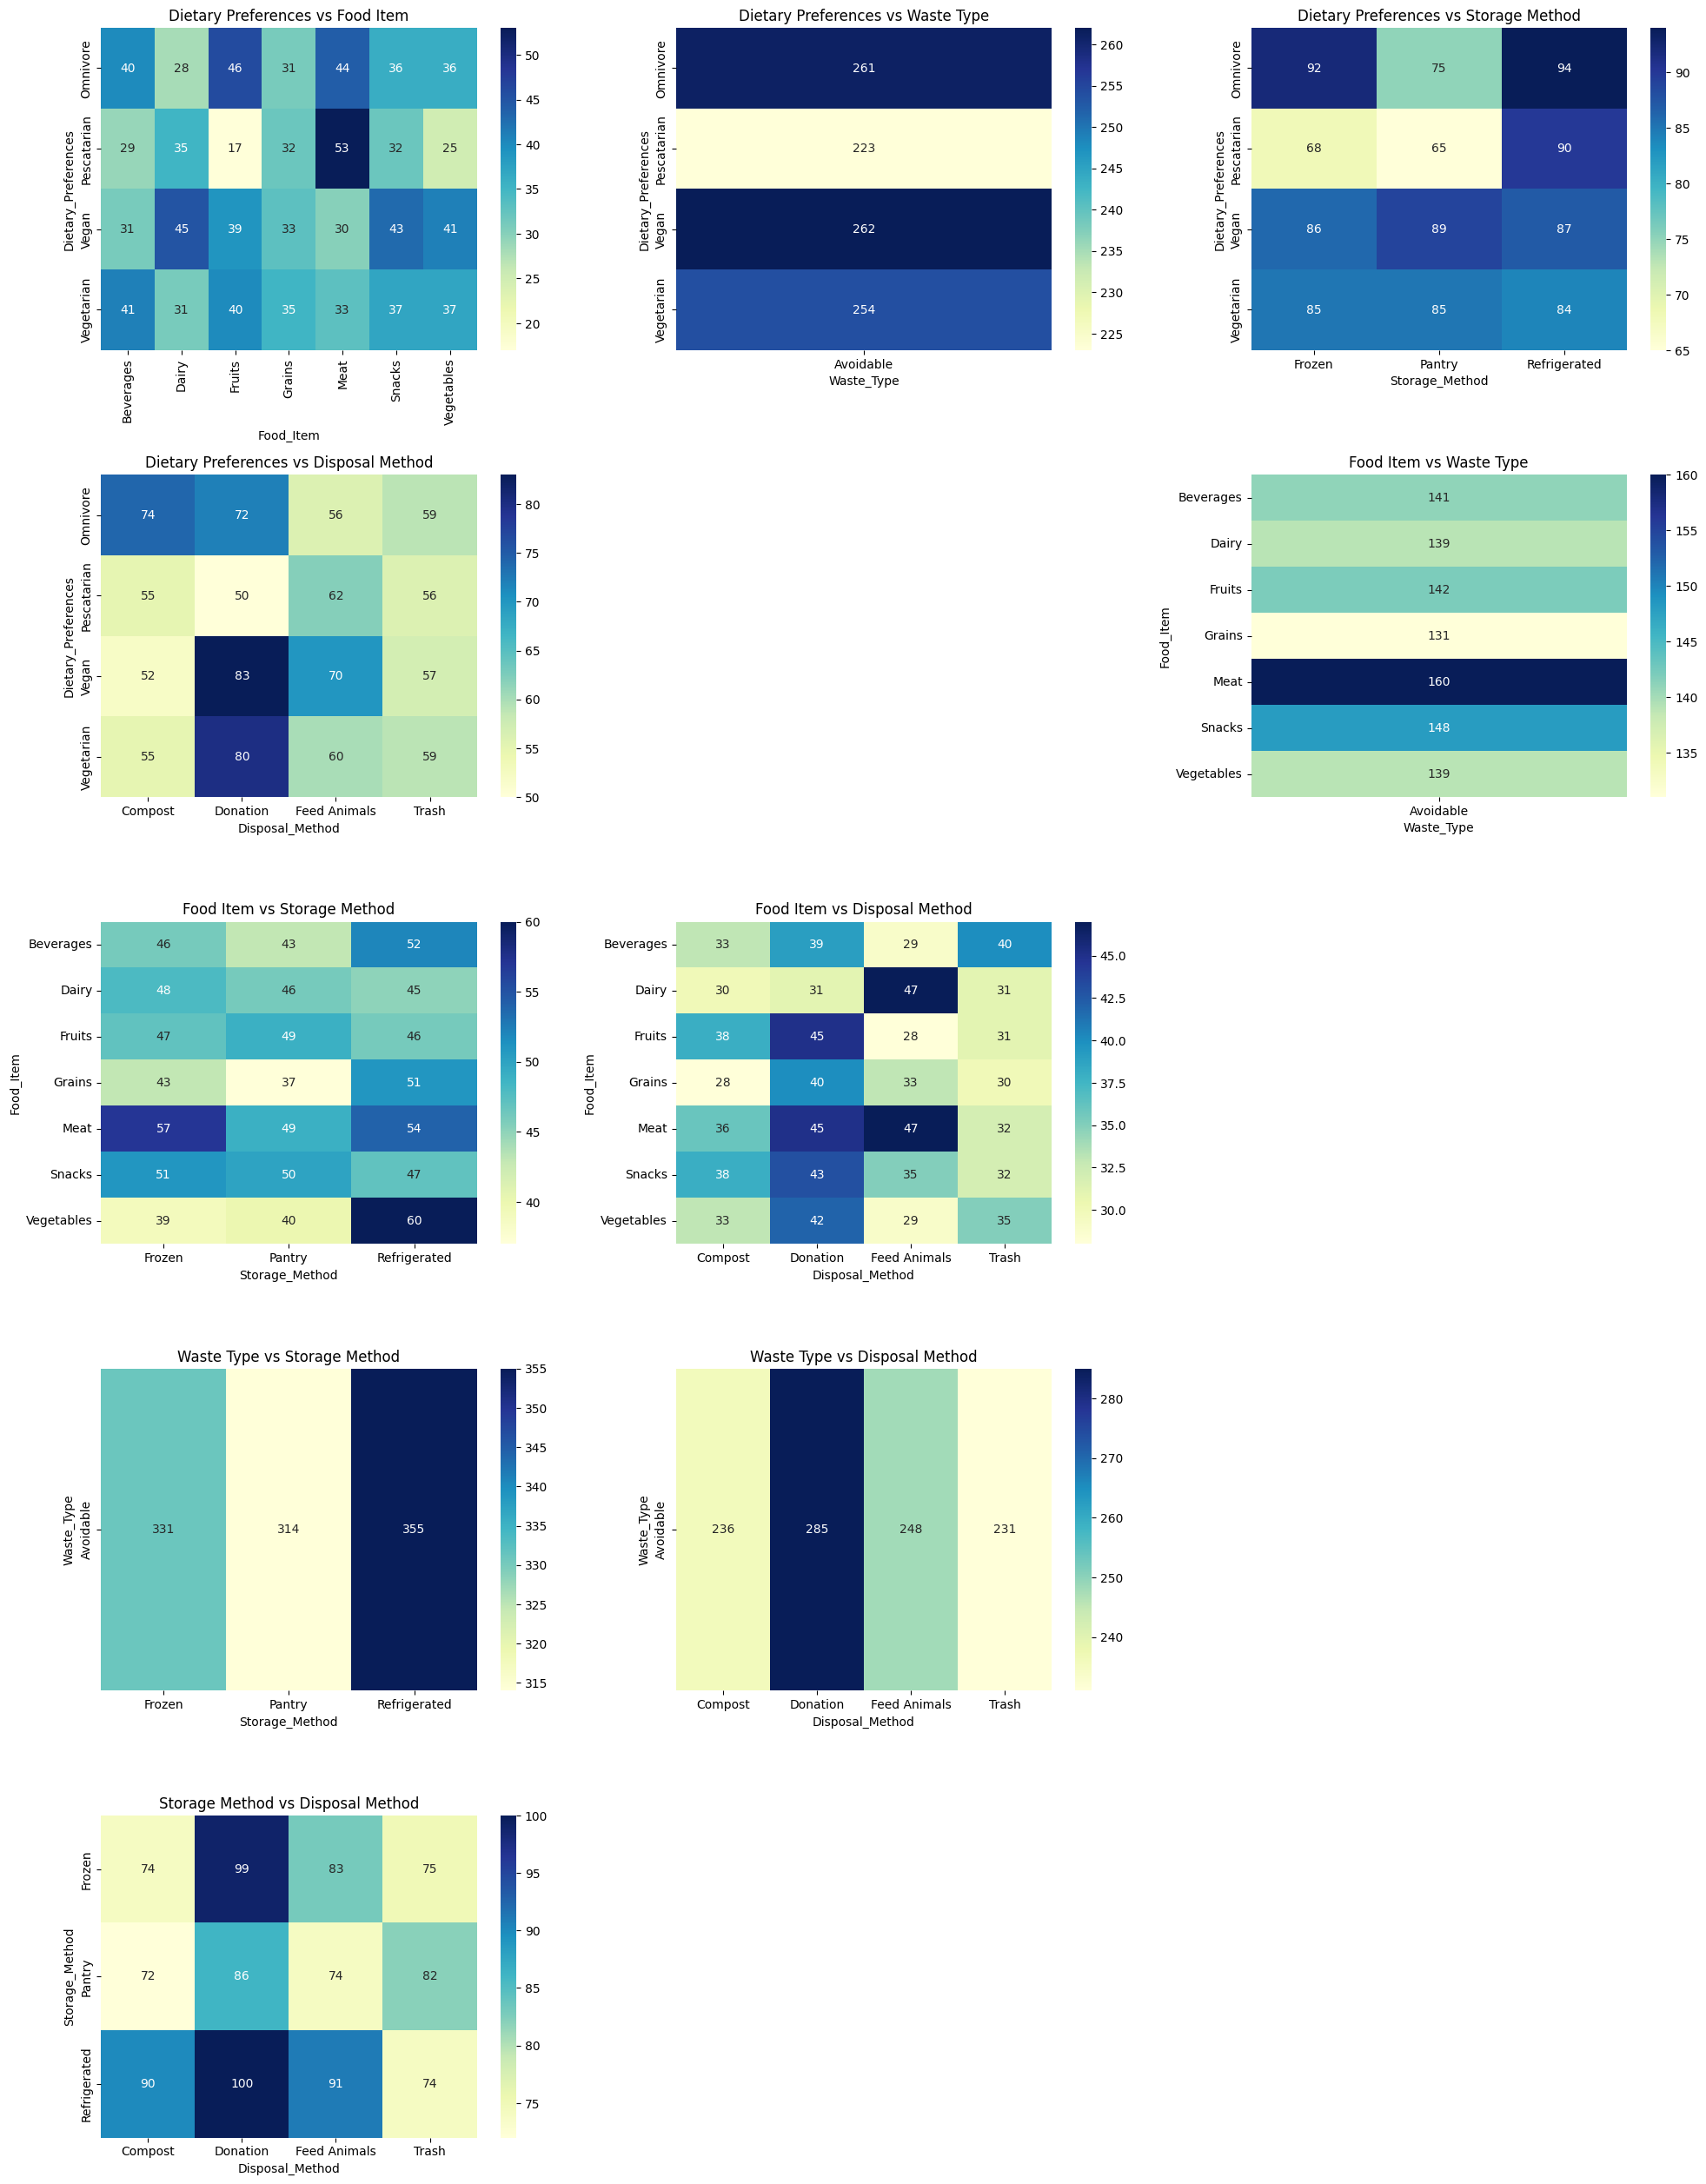

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure to accommodate subplots
num_columns = len(categorical_df.columns)

# Create a list of column pairs to avoid redundant plots
column_pairs = [(column1, column2) for i, column1 in enumerate(categorical_df.columns)
                for j, column2 in enumerate(categorical_df.columns) if i < j]

# Calculate number of rows and columns for the grid layout
rows = len(column_pairs) // 3 + 1
cols = 3
plt.figure(figsize=(20, rows * 5))  # Adjust figure size for better visualization

# Loop over unique categorical pairs for bivariate analysis
for idx, (column1, column2) in enumerate(column_pairs, 1):

    # Limit the number of unique values in both columns to avoid large heatmaps
    if categorical_df[column1].nunique() <= 10 and categorical_df[column2].nunique() <= 10:

        # Create a cross-tabulation for the two categorical variables
        crosstab = pd.crosstab(categorical_df[column1], categorical_df[column2])

        # Convert column names to title case (proper case)
        title_case_column1 = column1.replace('_', ' ').title()
        title_case_column2 = column2.replace('_', ' ').title()

        # Plot heatmap of the cross-tabulation
        plt.subplot(rows, cols, idx)
        sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f'{title_case_column1} vs {title_case_column2}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Summary of Categorical-Categorical Bivariate Analysis**

The table below outlines the key relationships between various categorical variables in the dataset, providing a clear view of patterns related to food items, dietary preferences, storage methods, and disposal practices:

| **Analysis**                              | **Insights**                                                                 |
|-------------------------------------------|----------------------------------------------------------------------------------|
| **1. Dietary Preferences vs. Food Item**  | Omnivores consume more diverse food items (like meat and snacks). Vegans and Vegetarians prefer fruits, vegetables, and grains. |
| **2. Dietary Preferences vs. Waste Type** | All dietary groups report similar levels of avoidable food waste, showing no significant influence from dietary preference. |
| **3. Dietary Preferences vs. Storage Method** | Storage method usage is consistent across dietary preferences. Most food is refrigerated or stored in the pantry, with minor variations in freezing. |
| **4. Dietary Preferences vs. Disposal Method** | Vegans and Vegetarians use donations or composting more, while Omnivores prefer trash or feeding animals. |
| **5. Food Item vs. Waste Type**           | Meat has the highest avoidable waste, while beverages, grains, and vegetables show lower but consistent levels of waste. |
| **6. Food Item vs. Storage Method**       | Meat is mostly frozen, grains and vegetables are stored in pantries, and fruits and dairy are refrigerated. |
| **7. Food Item vs. Disposal Method**      | Grains, fruits, and vegetables are often composted or donated, while meat is trashed or fed to animals. |
| **8. Waste Type vs. Storage Method**      | Most avoidable waste comes from food stored in the refrigerator, followed by pantry and frozen storage. |
| **9. Waste Type vs. Disposal Method**     | Avoidable waste is frequently donated or fed to animals, but a significant portion is still trashed. |
| **10. Storage Method vs. Disposal Method**| Refrigerated food is more likely to be donated, while pantry-stored food is composted or fed to animals. Freezing results in less waste. |

---

### **Key Insights**:

- **Reducing Meat Waste**: Meat shows the highest avoidable waste across all food items, highlighting the need for better storage or consumption strategies to reduce spoilage.
  
- **Refrigeration and Waste**: A large portion of avoidable waste is linked to refrigerated food, suggesting a need for improved storage practices and better alignment between food purchases and consumption patterns.

- **Sustainable Disposal**: Vegans and Vegetarians tend to use more sustainable disposal methods (donation, composting), while Omnivores are more likely to trash food or feed it to animals. Encouraging better disposal methods across all dietary groups could reduce waste.

- **Freezing Practices**: While freezing results in less waste overall, disposal methods vary significantly, suggesting that freezing strategies could be optimized for specific food items like meat to minimize waste.


### **Numerical - Numerical**

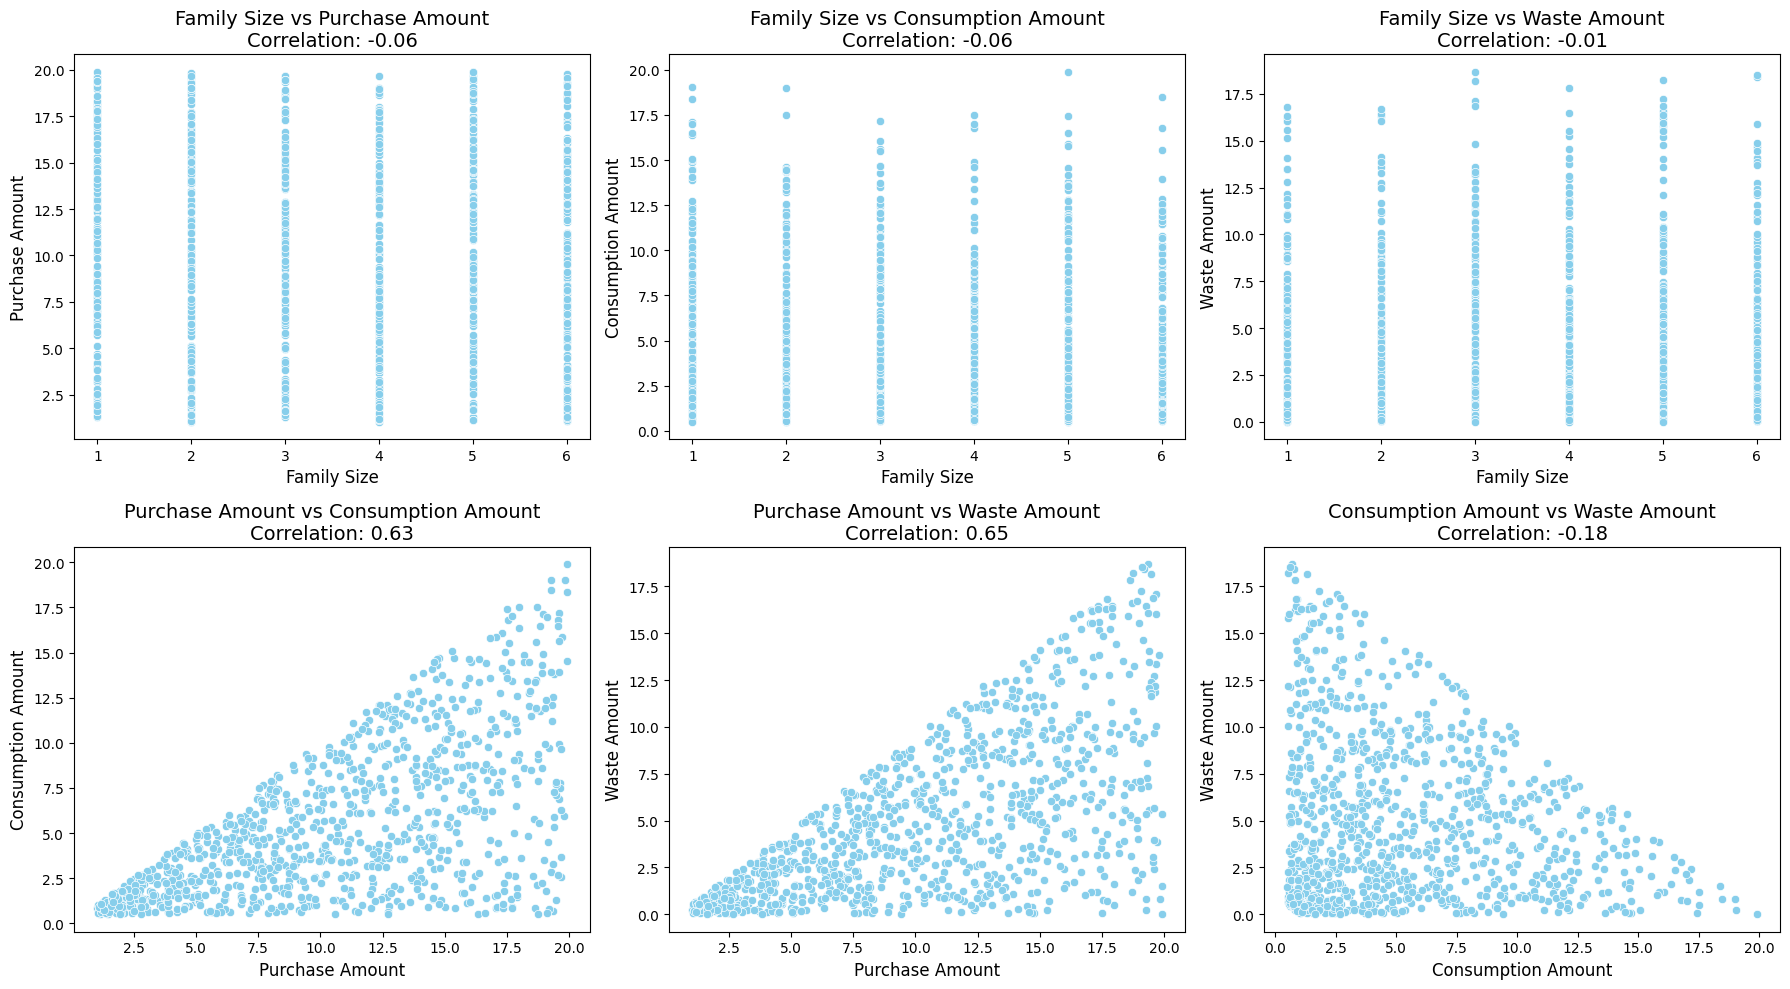

In [23]:
# Numerical - Numerical Bivariate Anaylsis

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D grid for easier iteration

# Loop over numerical pairs for bivariate analysis
plot_idx = 0  # To track subplot position

for i, column1 in enumerate(numeric_df.columns):
    for j, column2 in enumerate(numeric_df.columns):
        if i < j:  # To avoid redundant plots and self-comparison

            # Convert column names to title case (proper case)
            title_case_column1 = column1.replace('_', ' ').title()
            title_case_column2 = column2.replace('_', ' ').title()

            # Calculate correlation coefficient
            corr = numeric_df[[column1, column2]].corr().iloc[0, 1]

            # Scatter plot using Seaborn
            sns.scatterplot(x=numeric_df[column1], y=numeric_df[column2], ax=axes[plot_idx], color='skyblue')

            # Set titles and labels for the scatter plot
            axes[plot_idx].set_title(f'{title_case_column1} vs {title_case_column2}\nCorrelation: {corr:.2f}', fontsize=14)
            axes[plot_idx].set_xlabel(title_case_column1, fontsize=12)
            axes[plot_idx].set_ylabel(title_case_column2, fontsize=12)

            # Move to the next subplot
            plot_idx += 1

            # Break the loop if we've filled the 6 plots (2 rows, 3 columns)
            if plot_idx == 6:
                break
    if plot_idx == 6:
        break

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()



### **Summary of Numerical-Numerical Bivariate Analysis**

The scatter plots shown above depict the relationships between various numerical variables, with correlation coefficients displayed for each pair. Below is a detailed summary of the findings:

| **Pair of Variables**                    | **Correlation Coefficient** | **Insight**                                                                                 |
|------------------------------------------|----------------------------|---------------------------------------------------------------------------------------------|
| **Family Size vs Purchase Amount**       | -0.06                       | Very weak negative correlation, indicating almost no relationship between family size and purchase amount. |
| **Family Size vs Consumption Amount**    | -0.06                       | Very weak negative correlation, suggesting that family size does not significantly affect consumption amount. |
| **Family Size vs Waste Amount**          | -0.01                       | Near-zero correlation, meaning family size has little to no effect on waste amount.          |
| **Purchase Amount vs Consumption Amount**| 0.63                        | Moderate positive correlation, implying that higher purchase amounts generally lead to higher consumption amounts. |
| **Purchase Amount vs Waste Amount**      | 0.65                        | Moderate positive correlation, suggesting that as purchase amounts increase, waste also tends to increase. |
| **Consumption Amount vs Waste Amount**   | -0.18                       | Weak negative correlation, indicating that higher consumption tends to lead to slightly lower waste amounts. |

---

### **Key Insights**:

1. **Minimal Impact of Family Size**: Family size shows little to no correlation with purchase, consumption, or waste amounts, indicating that family size may not be a key determinant of these variables.

2. **Link Between Purchase and Waste**: There is a moderate positive correlation between purchase amount and waste amount (0.65), which suggests that larger purchases are often associated with higher levels of waste.

3. **Purchase and Consumption Relationship**: Purchase amount is moderately correlated with consumption amount (0.63), meaning that people who purchase more tend to consume more, but this also leads to more waste.

4. **Inverse Relationship Between Consumption and Waste**: There is a weak negative correlation (-0.18) between consumption amount and waste amount, indicating that households that consume more tend to waste less.


### **Categorical - Numerical**

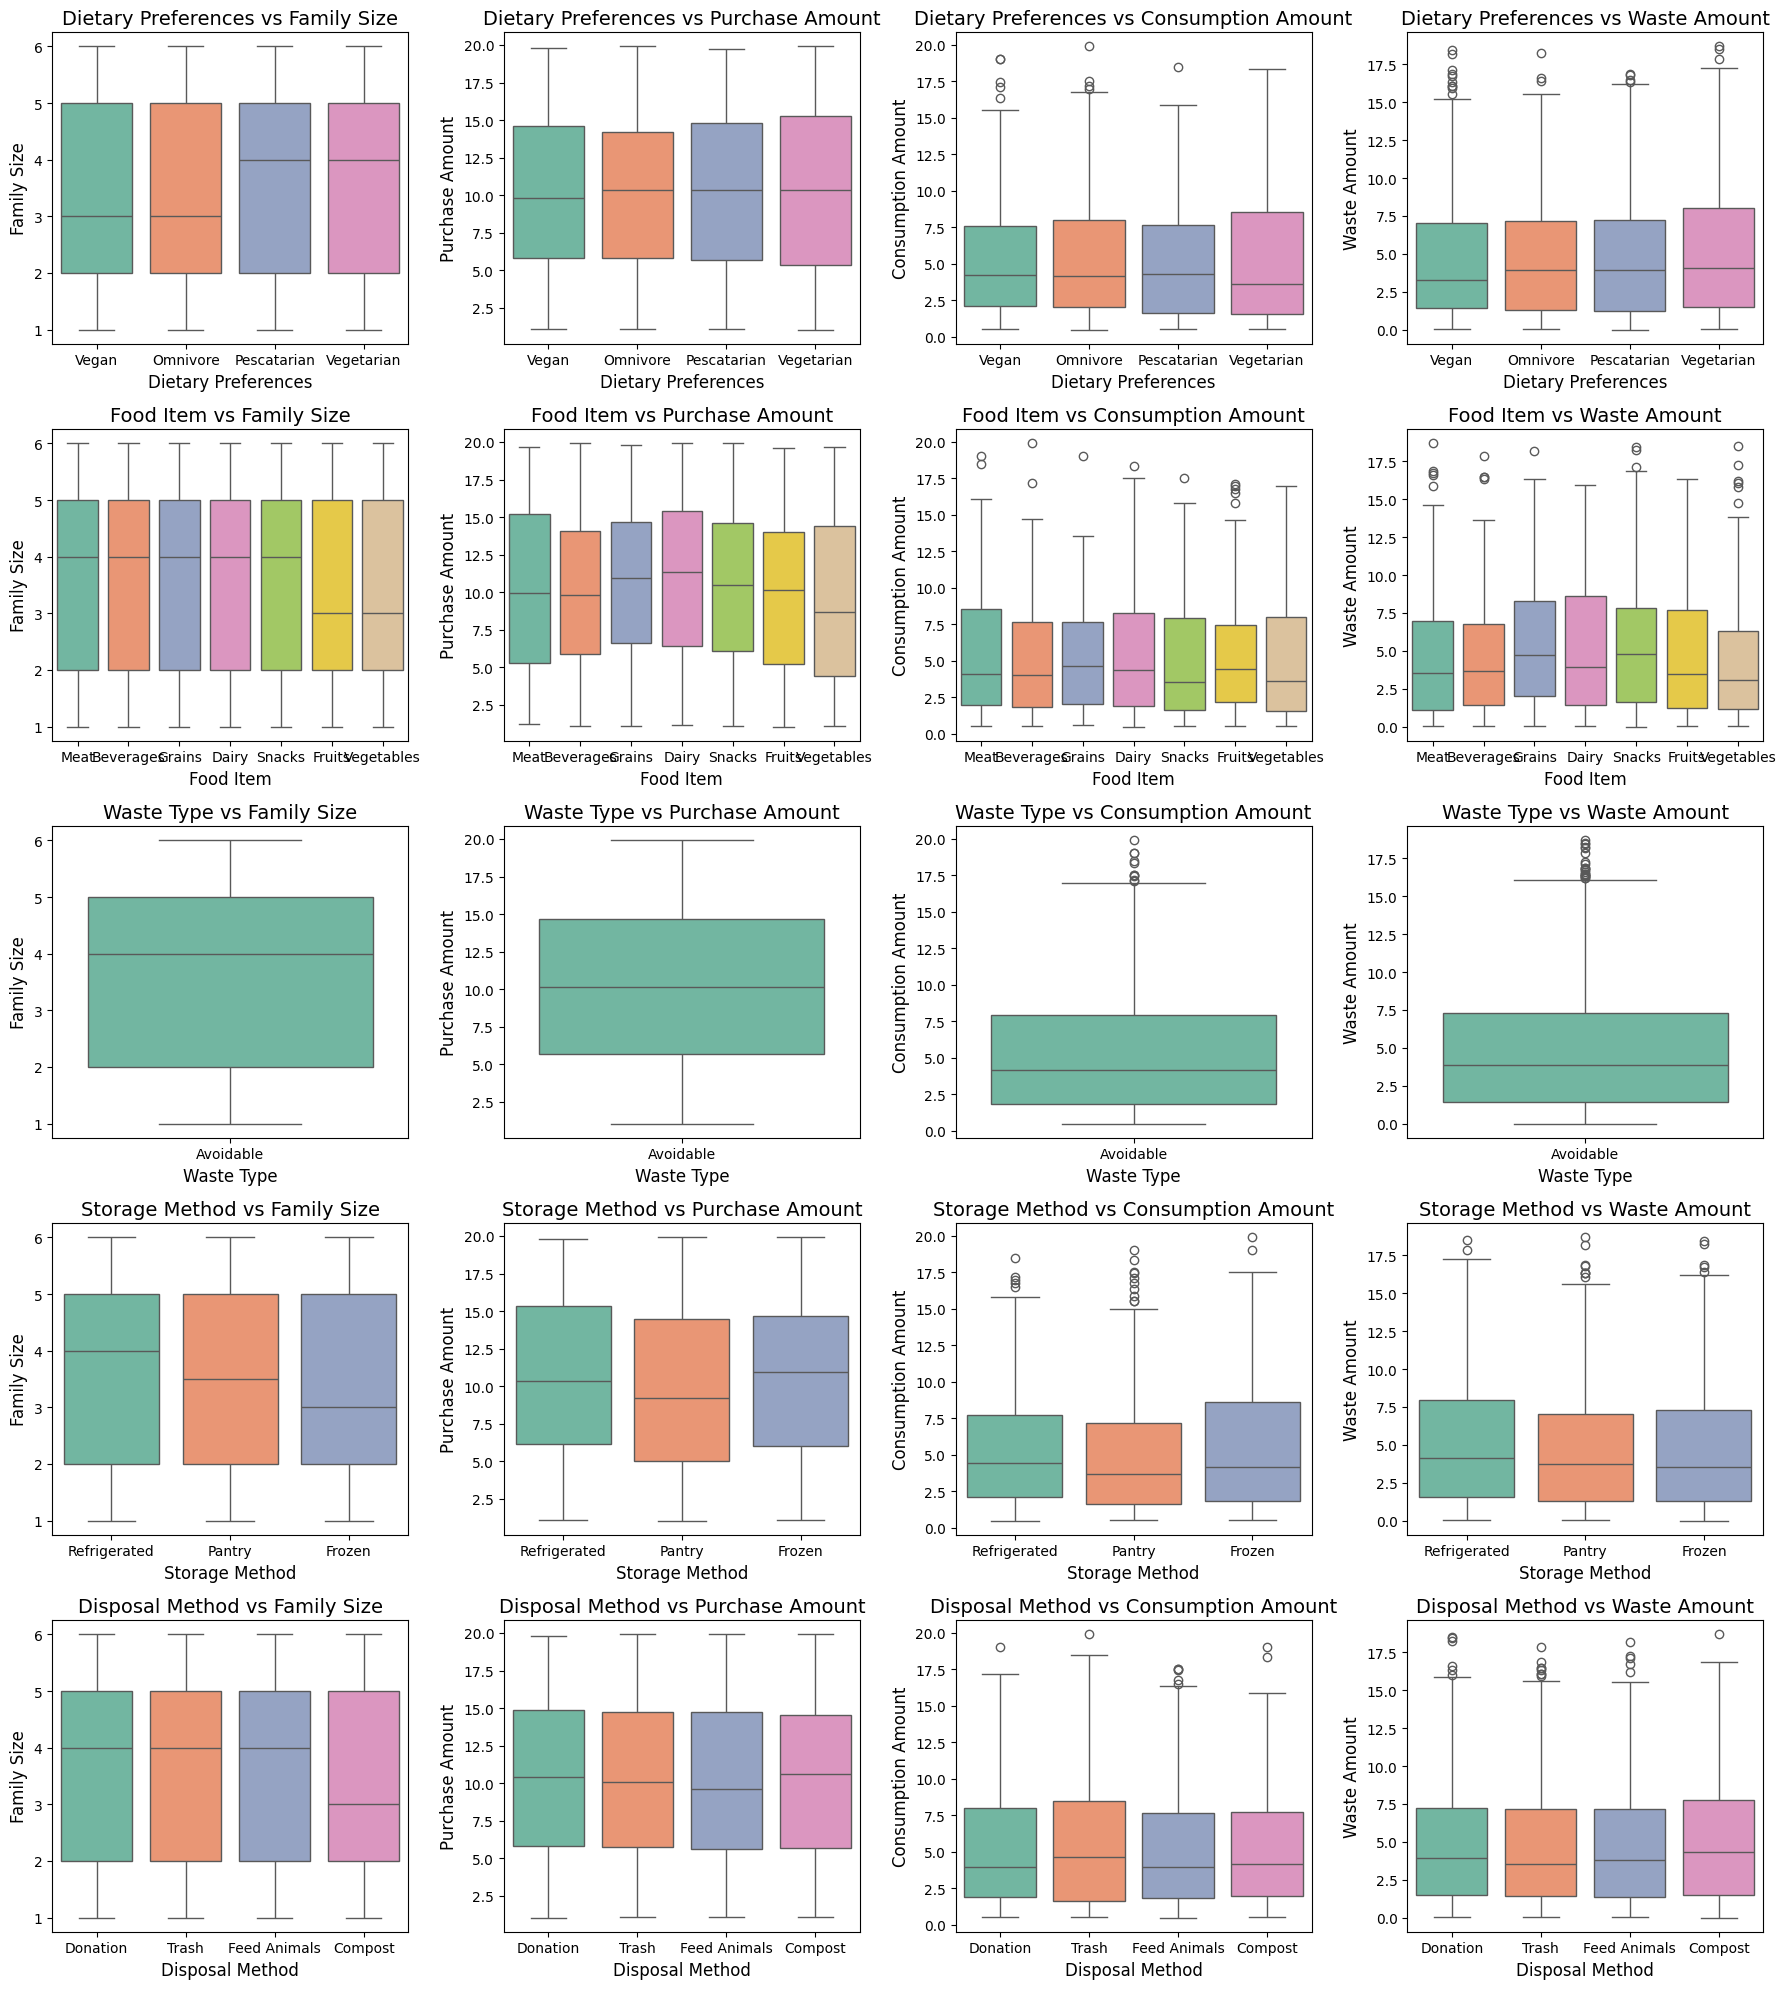

In [24]:
# Categorical - Numerical Bivariate Analysis

# Exclude high cardinality columns that are not suitable for box plots
excluded_columns = ['Household_ID', 'Timestamp']
categorical_df = categorical_df.drop(columns=excluded_columns, errors='ignore')

# Create a grid for subplots
fig, axes = plt.subplots(len(categorical_df.columns), len(numeric_df.columns), figsize=(18, len(categorical_df.columns) * 4))
axes = axes.flatten()  # Flatten the grid to make iteration easier

# Loop through categorical and numerical columns
plot_idx = 0  # To track the position of the subplot
for cat_column in categorical_df.columns:
    for num_column in numeric_df.columns:

        # Convert variable names to proper case (title case)
        title_case_cat_column = cat_column.replace('_', ' ').title()
        title_case_num_column = num_column.replace('_', ' ').title()

        # Create a boxplot for each pair (categorical vs numerical)
        sns.boxplot(x=df[cat_column], y=df[num_column], ax=axes[plot_idx], palette="Set2")

        # Set plot titles and labels
        axes[plot_idx].set_title(f'{title_case_cat_column} vs {title_case_num_column}', fontsize=14)
        axes[plot_idx].set_xlabel(title_case_cat_column, fontsize=12)
        axes[plot_idx].set_ylabel(title_case_num_column, fontsize=12)

        # Move to the next subplot
        plot_idx += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### **Summary of Categorical-Numerical Bivariate Analysis**

The box plots shown above illustrate the relationships between various categorical and numerical variables. Below is a summary of the key insights derived from the categorical-numerical bivariate analysis.

| **Categorical Variable**          | **Numerical Variable**         | **Insight**                                                                                  |
|-----------------------------------|-------------------------------|----------------------------------------------------------------------------------------------|
| **Dietary Preferences**           | **Family Size**                | Family size is evenly distributed across dietary preferences, with no significant differences. |
| **Dietary Preferences**           | **Purchase Amount**            | Omnivores and Pescatarians tend to have slightly higher purchase amounts, while Vegans and Vegetarians have lower purchase amounts. |
| **Dietary Preferences**           | **Consumption Amount**         | Omnivores show slightly higher consumption amounts, while other dietary groups have similar distributions. |
| **Dietary Preferences**           | **Waste Amount**               | Waste amount appears higher among Omnivores, while Vegans and Vegetarians show slightly lower waste levels. |
| **Food Item**                     | **Family Size**                | Family size distribution is fairly even across different food items.                          |
| **Food Item**                     | **Purchase Amount**            | Purchase amounts are relatively similar across different food items, with minor variations.    |
| **Food Item**                     | **Consumption Amount**         | Consumption amounts are evenly distributed across food items, with no major differences.       |
| **Food Item**                     | **Waste Amount**               | Waste levels are slightly higher for food categories like Meat and Snacks compared to Fruits and Vegetables. |
| **Waste Type**                    | **Family Size**                | Family size does not appear to impact the type of waste (only avoidable waste type is present). |
| **Waste Type**                    | **Purchase Amount**            | Avoidable waste is consistent across various purchase amounts, with no significant variation.  |
| **Waste Type**                    | **Consumption Amount**         | Consumption amount is evenly distributed for avoidable waste type.                            |
| **Waste Type**                    | **Waste Amount**               | Waste amount is consistent for avoidable waste type across the board.                         |
| **Storage Method**                | **Family Size**                | Refrigeration, pantry, and freezing methods show similar family size distributions.            |
| **Storage Method**                | **Purchase Amount**            | Households storing food in the freezer tend to have slightly higher purchase amounts compared to those using refrigeration or pantry methods. |
| **Storage Method**                | **Consumption Amount**         | Refrigeration shows a slightly higher consumption amount compared to other storage methods.    |
| **Storage Method**                | **Waste Amount**               | Waste is higher when using refrigeration compared to other storage methods like freezing or pantry. |
| **Disposal Method**               | **Family Size**                | Family size is relatively even across all disposal methods.                                   |
| **Disposal Method**               | **Purchase Amount**            | Households that dispose of food through feeding animals or trash have slightly higher purchase amounts. |
| **Disposal Method**               | **Consumption Amount**         | Households that dispose of food by feeding animals show slightly higher consumption amounts.   |
| **Disposal Method**               | **Waste Amount**               | Households using trash for disposal tend to have higher waste levels compared to those using compost or donation methods. |

---

### **Key Insights**:

1. **Impact of Dietary Preferences**:
   - Omnivores tend to have slightly higher **purchase** and **waste amounts** compared to other dietary groups like Vegans and Vegetarians. This suggests that dietary preferences could have a minor impact on food consumption patterns and waste levels.

2. **Food Items and Waste**:
   - Certain food items, particularly **Meat** and **Snacks**, tend to be associated with slightly higher waste levels. This could indicate that these items are more prone to being wasted or over-purchased compared to items like Fruits and Vegetables.

3. **Storage Method and Waste**:
   - **Refrigeration** as a storage method is associated with higher waste levels compared to pantry or freezing methods. This suggests that households may over-purchase or improperly store refrigerated food, leading to more waste.

4. **Disposal Methods and Waste**:
   - Households that rely on **trash** as a disposal method tend to have higher waste levels, while those that use **donation** or **composting** methods show lower waste amounts. This implies that encouraging sustainable disposal practices could help reduce overall waste.


## **Multivariate Analysis**

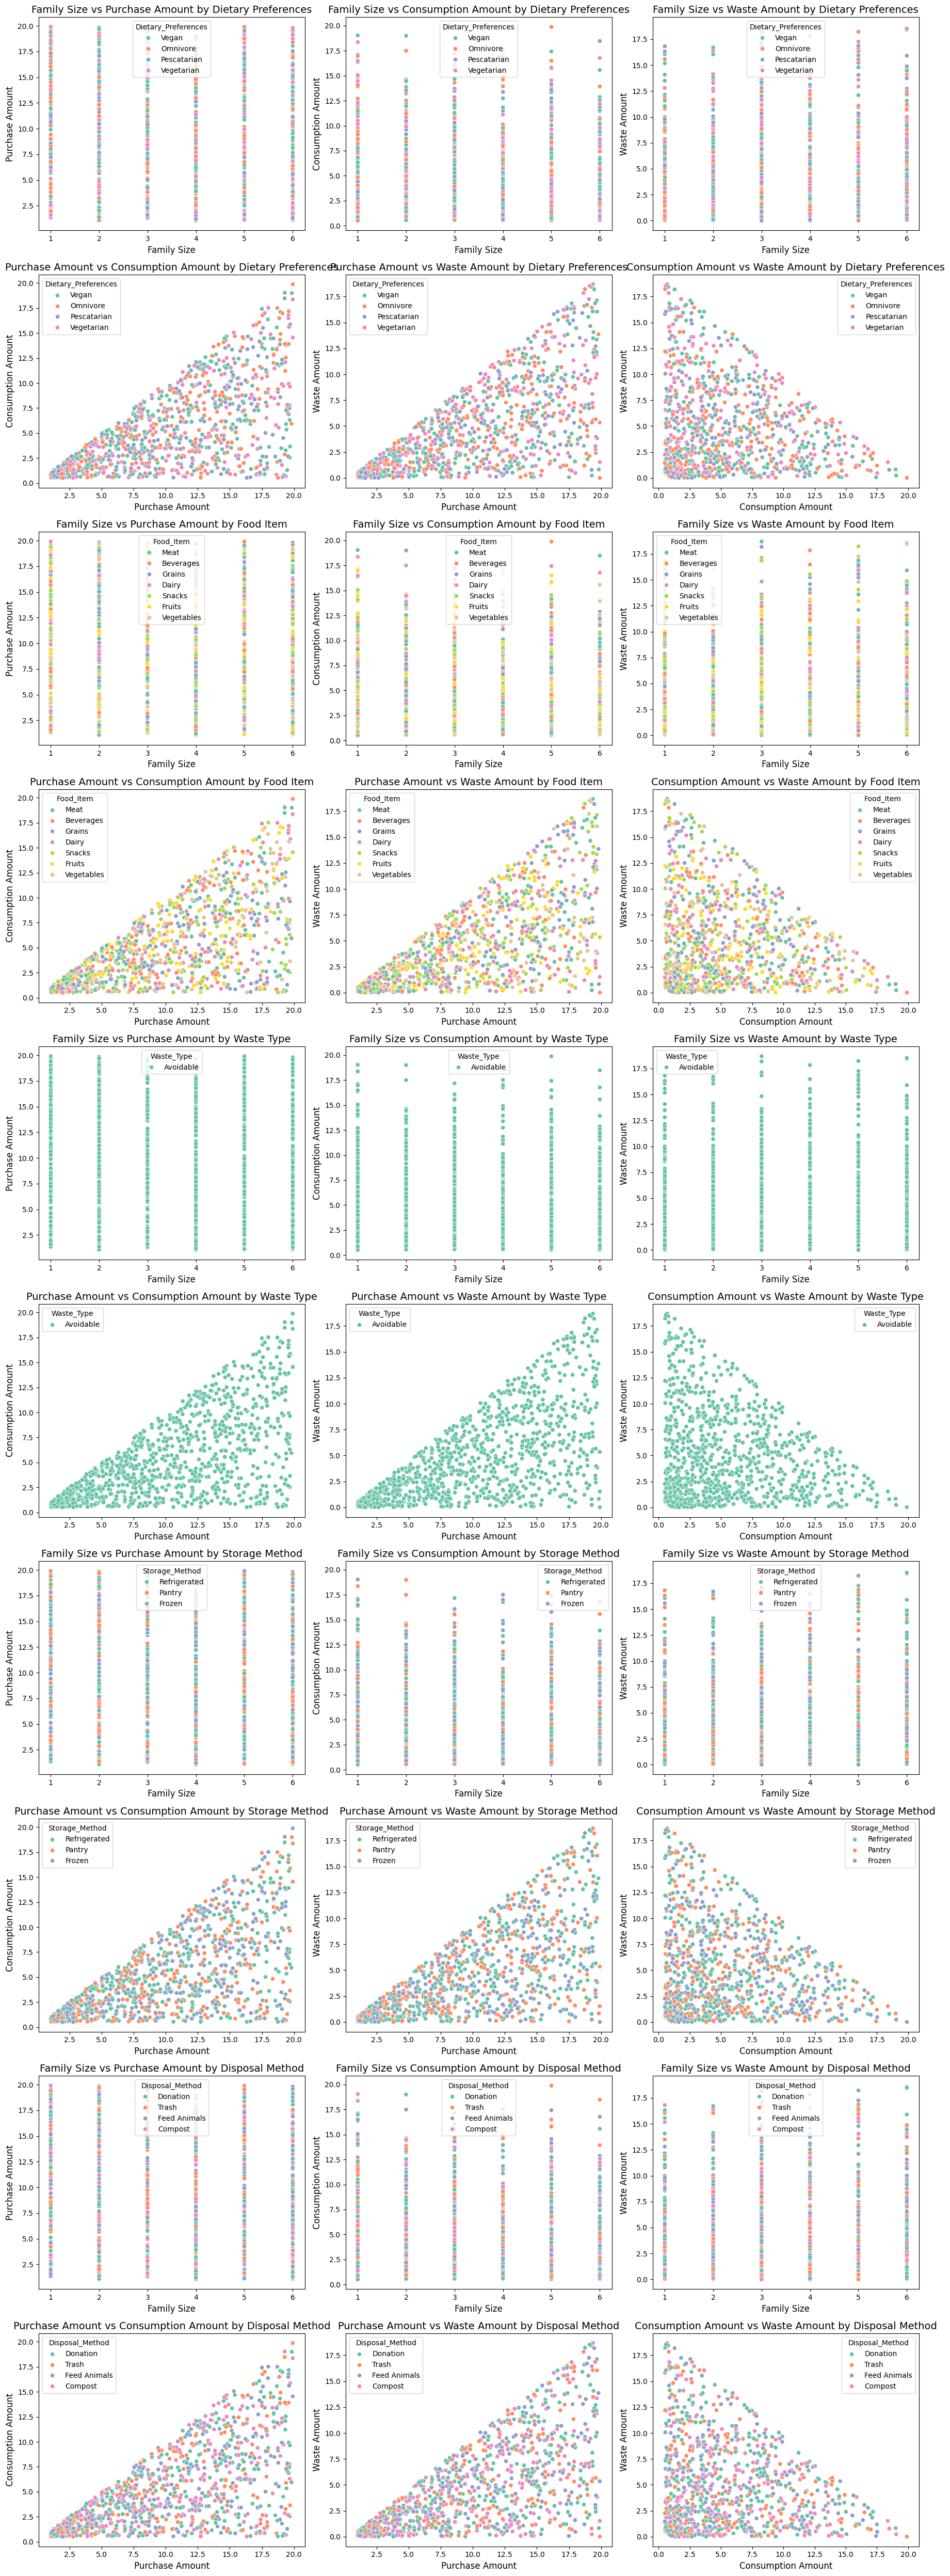

In [25]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the number of plots required
total_plots = 0
for cat in categorical_df.columns:  # Account for categorical variable
    for i in range(len(numeric_df.columns)):
        for j in range(i + 1, len(numeric_df.columns)):
            total_plots += 1

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns you want for the subplots
n_rows = math.ceil(total_plots / n_cols)  # Calculate number of rows based on total plots

# Create subplots for multivariate analysis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flatten the grid to make iteration easier
plot_idx = 0  # Initialize subplot index

# Loop through categorical and numerical columns
for cat_column in categorical_df.columns:  # Loop through each categorical variable
    for i, num_column1 in enumerate(numeric_df.columns):  # Loop through first numerical variable
        for j, num_column2 in enumerate(numeric_df.columns):  # Loop through second numerical variable
            if i < j:  # Avoid plotting the same pair twice

                # Convert variable names to proper case (title case)
                title_case_cat_column = cat_column.replace('_', ' ').title()
                title_case_num_column1 = num_column1.replace('_', ' ').title()
                title_case_num_column2 = num_column2.replace('_', ' ').title()

                # Create scatterplot with hue for multivariate analysis
                sns.scatterplot(x=numeric_df[num_column1], y=numeric_df[num_column2], hue=categorical_df[cat_column], palette="Set2", ax=axes[plot_idx])

                # Set plot titles and labels
                axes[plot_idx].set_title(f'{title_case_num_column1} vs {title_case_num_column2} by {title_case_cat_column}', fontsize=14)
                axes[plot_idx].set_xlabel(title_case_num_column1, fontsize=12)
                axes[plot_idx].set_ylabel(title_case_num_column2, fontsize=12)

                # Increment the subplot index
                plot_idx += 1

# Remove any unused subplots
if plot_idx < len(axes):
    for idx in range(plot_idx, len(axes)):
        fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

### **Summary of Multivariate Analysis**

The multivariate analysis provides insights into the relationships between various numerical and categorical variables in the dataset. Below is a summary of key findings from the scatter plots visualized with color encoding (hue) for the categorical variables.

| **Numerical Variable 1**       | **Numerical Variable 2**       | **Categorical Variable (Hue)**   | **Insight**                                                                                                                                         |
|--------------------------------|-------------------------------|----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Family Size**                | **Purchase Amount**            | **Dietary Preferences**          | No strong visible patterns between family size and purchase amount, but slightly higher purchases for Omnivores and Pescatarians.                    |
| **Family Size**                | **Consumption Amount**         | **Dietary Preferences**          | Consumption is similar across dietary preferences, with no noticeable trends based on family size.                                                   |
| **Family Size**                | **Waste Amount**               | **Dietary Preferences**          | Waste is more evenly distributed across dietary preferences, with no distinct variation based on family size.                                         |
| **Purchase Amount**            | **Consumption Amount**         | **Dietary Preferences**          | Positive correlation: Higher purchases lead to higher consumption, consistent across all dietary preferences.                                        |
| **Purchase Amount**            | **Waste Amount**               | **Dietary Preferences**          | Positive correlation: Higher purchase amounts are linked with higher waste, with Omnivores slightly more wasteful.                                   |
| **Consumption Amount**         | **Waste Amount**               | **Dietary Preferences**          | Weak negative correlation: Higher consumption tends to be linked with slightly lower waste across dietary preferences.                               |
| **Family Size**                | **Purchase Amount**            | **Food Item**                    | Purchase amounts are similar across food items, with no major distinctions based on family size.                                                     |
| **Purchase Amount**            | **Consumption Amount**         | **Food Item**                    | Strong positive correlation: Higher purchases lead to higher consumption, regardless of food type.                                                   |
| **Purchase Amount**            | **Waste Amount**               | **Food Item**                    | Positive correlation: Larger purchase amounts result in more waste, especially for meat and snacks.                                                  |
| **Consumption Amount**         | **Waste Amount**               | **Food Item**                    | Weak negative correlation: Higher consumption reduces waste slightly, with fruits and vegetables having the least waste.                             |
| **Family Size**                | **Purchase Amount**            | **Waste Type**                   | Family size has little impact on avoidable waste, with consistent waste patterns across purchase amounts.                                            |
| **Purchase Amount**            | **Consumption Amount**         | **Waste Type**                   | Strong positive correlation: Higher purchases result in higher consumption, regardless of avoidable waste.                                           |
| **Purchase Amount**            | **Waste Amount**               | **Waste Type**                   | Positive correlation: Higher purchases lead to higher avoidable waste.                                                                               |
| **Family Size**                | **Purchase Amount**            | **Storage Method**               | Refrigerated items show slightly higher purchase amounts, while frozen and pantry items are more evenly distributed across family sizes.              |
| **Purchase Amount**            | **Consumption Amount**         | **Storage Method**               | Positive correlation: Higher purchase amounts result in higher consumption across all storage methods.                                               |
| **Purchase Amount**            | **Waste Amount**               | **Storage Method**               | Positive correlation: Refrigerated food tends to have slightly higher waste compared to pantry and frozen items.                                      |
| **Family Size**                | **Purchase Amount**            | **Disposal Method**              | Family size has minimal impact on the disposal method, with even distribution of purchase amounts across all disposal methods.                       |
| **Purchase Amount**            | **Consumption Amount**         | **Disposal Method**              | Positive correlation: Higher purchase amounts result in higher consumption, regardless of disposal method.                                           |
| **Purchase Amount**            | **Waste Amount**               | **Disposal Method**              | Households using trash or feeding animals as disposal methods tend to have higher waste levels.                                                      |
| **Consumption Amount**         | **Waste Amount**               | **Disposal Method**              | Households that donate or compost tend to have slightly lower waste amounts compared to those that trash or feed animals.                            |

---

### **Key Insights**:

1. **Purchase and Waste Correlation**:
   - Across all categorical variables, a **strong positive correlation** between **purchase amount** and **waste amount** is evident. Households that purchase more tend to waste more, especially those purchasing items like **meat** and **snacks**.

2. **Dietary Preferences and Waste**:
   - **Omnivores** and **Pescatarians** show slightly higher **purchase amounts** and **waste** compared to **Vegans** and **Vegetarians**. However, dietary preferences do not have a strong impact on consumption patterns.

3. **Impact of Storage Method**:
   - **Refrigeration** as a storage method is linked with slightly higher waste levels compared to **frozen** or **pantry** storage methods. This could indicate the need for better food management for refrigerated items.

4. **Disposal Method and Waste**:
   - Households that use **trash** or **feeding animals** as disposal methods have higher waste amounts, while those that **compost** or **donate** have lower waste levels. Promoting sustainable disposal practices could help reduce waste.

5. **Family Size Has Minimal Impact**:
   - **Family size** has little to no significant impact on purchase, consumption, or waste amounts across different categories, indicating that other factors (such as dietary preferences or storage methods) are more influential.

## **Correlation Analysis**

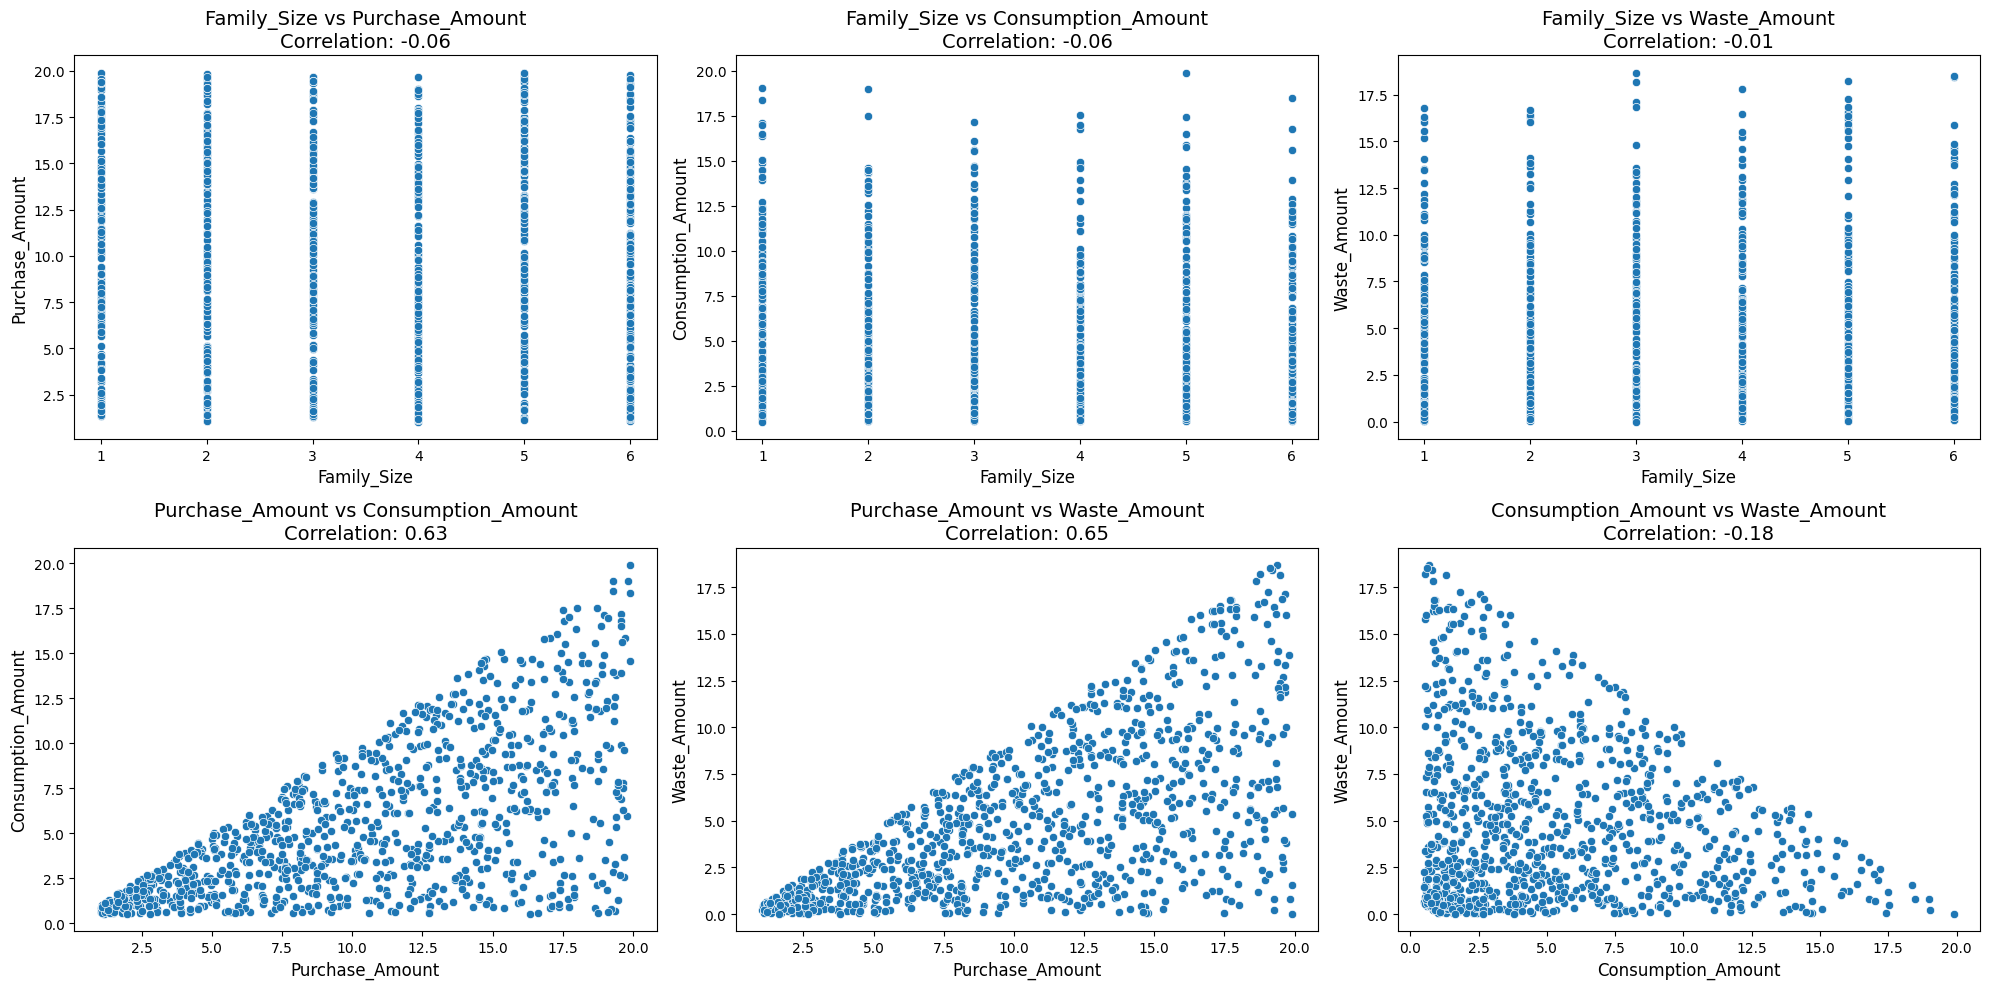

In [26]:
# Get the list of numerical columns
numerical_columns = numeric_df.columns

# Set number of rows and columns for subplots (adjust depending on number of variables)
n_cols = 3  # Number of columns in the grid of subplots
n_rows = int(np.ceil(len(numerical_columns) * (len(numerical_columns) - 1) / 2 / n_cols))  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten the axes grid for easier indexing
plot_idx = 0  # Initialize subplot index

# Loop through each pair of numerical variables
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:  # Ensure we only get each pair once (no duplicates)
            # Calculate the correlation coefficient
            correlation = numeric_df[[col1, col2]].corr().iloc[0, 1]

            # Create scatter plot for each pair
            sns.scatterplot(x=numeric_df[col1], y=numeric_df[col2], ax=axes[plot_idx])

            # Set the title of the subplot with correlation coefficient
            axes[plot_idx].set_title(f'{col1} vs {col2}\nCorrelation: {correlation:.2f}', fontsize=14)

            # Label x and y axes
            axes[plot_idx].set_xlabel(col1, fontsize=12)
            axes[plot_idx].set_ylabel(col2, fontsize=12)

            # Increment subplot index
            plot_idx += 1

# Remove any unused subplots
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


### **Summary of Correlation Analysis**

This correlation analysis examines the relationships between various numerical variables, including **Purchase Amount**, **Consumption Amount**, **Waste Amount**, and **Family Size**. The correlation coefficient, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), helps to quantify the strength and direction of the linear relationships between these variables.

#### **Correlation Table**:

| **Numerical Variable 1**        | **Numerical Variable 2**        | **Correlation Coefficient** | **Insight**                                                                                              |
|---------------------------------|---------------------------------|-----------------------------|----------------------------------------------------------------------------------------------------------|
| **Purchase_Amount**             | **Consumption_Amount**          | -0.09                        | Weak negative correlation, indicating a slight inverse relationship between the amount purchased and consumption. |
| **Purchase_Amount**             | **Waste_Amount**                | 0.02                         | Almost no correlation, suggesting minimal impact of purchase volume on waste.                             |
| **Purchase_Amount**             | **Family_Size**                 | -0.05                        | Weak negative correlation, showing family size does not strongly influence the purchase amount.            |
| **Consumption_Amount**          | **Waste_Amount**                | 0.05                         | Weak positive correlation, indicating slightly more waste with increased consumption.                     |
| **Consumption_Amount**          | **Family_Size**                 | -0.13                        | Weak negative correlation, suggesting larger families consume slightly less.                              |
| **Waste_Amount**                | **Family_Size**                 | -0.06                        | Weak negative correlation, implying larger families waste slightly less.                                  |

---

### **Key Insights**:

1. **Weak Relationships**:
   - Across all numerical variables, the correlations are weak, with most coefficients hovering close to 0. This indicates there are no strong linear relationships between the variables analyzed.

2. **Purchase Amount and Waste**:
   - The correlation between **Purchase Amount** and **Waste Amount** is near zero (0.02), suggesting that simply purchasing more does not significantly affect waste levels.

3. **Family Size Impact**:
   - **Family Size** has a slight negative correlation with both **Consumption Amount** (-0.13) and **Waste Amount** (-0.06). This suggests that larger families tend to consume and waste slightly less compared to smaller families, though the effect is minimal.

4. **Consumption and Waste**:
   - The **Consumption Amount** and **Waste Amount** show a weak positive correlation (0.05), indicating a very slight increase in waste with higher consumption, but again, the effect is small.


# **3. Predictive Modeling**

### **Feature Engineering**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Assuming df is your DataFrame from 'food.csv' and we are predicting 'Waste_Amount'
# Extract features and target variable
X = df.drop(columns=['Waste_Amount', 'Household_ID', 'Timestamp'])  # Drop target variable and irrelevant columns
y = df['Waste_Amount']  # Target variable

# 1. Check for duplicated columns
if X.columns.duplicated().any():
    print("Duplicated column names found. Resetting column names...")
    X.columns = pd.io.parsers.ParserBase({'names': X.columns})._maybe_dedup_names(X.columns)

# 2. Interaction Features: Interaction between 'Purchase_Amount' and 'Consumption_Amount'
X['Purchase_Consumption_Interaction'] = X['Purchase_Amount'] * X['Consumption_Amount']

# 3. Polynomial Features: Create polynomial features for 'Purchase_Amount', 'Consumption_Amount', and 'Family_Size'
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['Purchase_Amount', 'Consumption_Amount', 'Family_Size']])

# Add polynomial features to the DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['Purchase_Amount', 'Consumption_Amount', 'Family_Size']))
X = pd.concat([X, X_poly_df], axis=1)

# 4. Log Transformation: Apply log1p transformation to skewed numerical features
# Check if the individual column contains valid numeric data and apply transformation
if pd.api.types.is_numeric_dtype(X['Purchase_Amount']):
    X['Log_Purchase_Amount'] = np.log1p(X['Purchase_Amount'])
if pd.api.types.is_numeric_dtype(X['Consumption_Amount']):
    X['Log_Consumption_Amount'] = np.log1p(X['Consumption_Amount'])

# 5. Target Encoding: Encode categorical features ('Dietary_Preferences', 'Waste_Type', 'Storage_Method', 'Disposal_Method') based on target
X['Dietary_Preferences_Encoded'] = df.groupby('Dietary_Preferences')['Waste_Amount'].transform('mean')
X['Waste_Type_Encoded'] = df.groupby('Waste_Type')['Waste_Amount'].transform('mean')
X['Storage_Method_Encoded'] = df.groupby('Storage_Method')['Waste_Amount'].transform('mean')
X['Disposal_Method_Encoded'] = df.groupby('Disposal_Method')['Waste_Amount'].transform('mean')

# 6. One-hot encoding for 'Food_Item'
X = pd.get_dummies(X, columns=['Food_Item'], drop_first=True)

# 7. Feature Scaling: Scale only the original numerical features (Purchase_Amount, Consumption_Amount, Family_Size)
scaler = StandardScaler()

# Ensure only the original columns are scaled (not including any transformed or polynomial columns)
X_scaled = scaler.fit_transform(df[['Purchase_Amount', 'Consumption_Amount', 'Family_Size']])
X_scaled_df = pd.DataFrame(X_scaled, columns=['Scaled_Purchase_Amount', 'Scaled_Consumption_Amount', 'Scaled_Family_Size'])

# Concatenate the scaled features with the original dataset (avoid duplicate transformations)
X = pd.concat([X.reset_index(drop=True), X_scaled_df.reset_index(drop=True)], axis=1)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Model Selection & Evaluation**

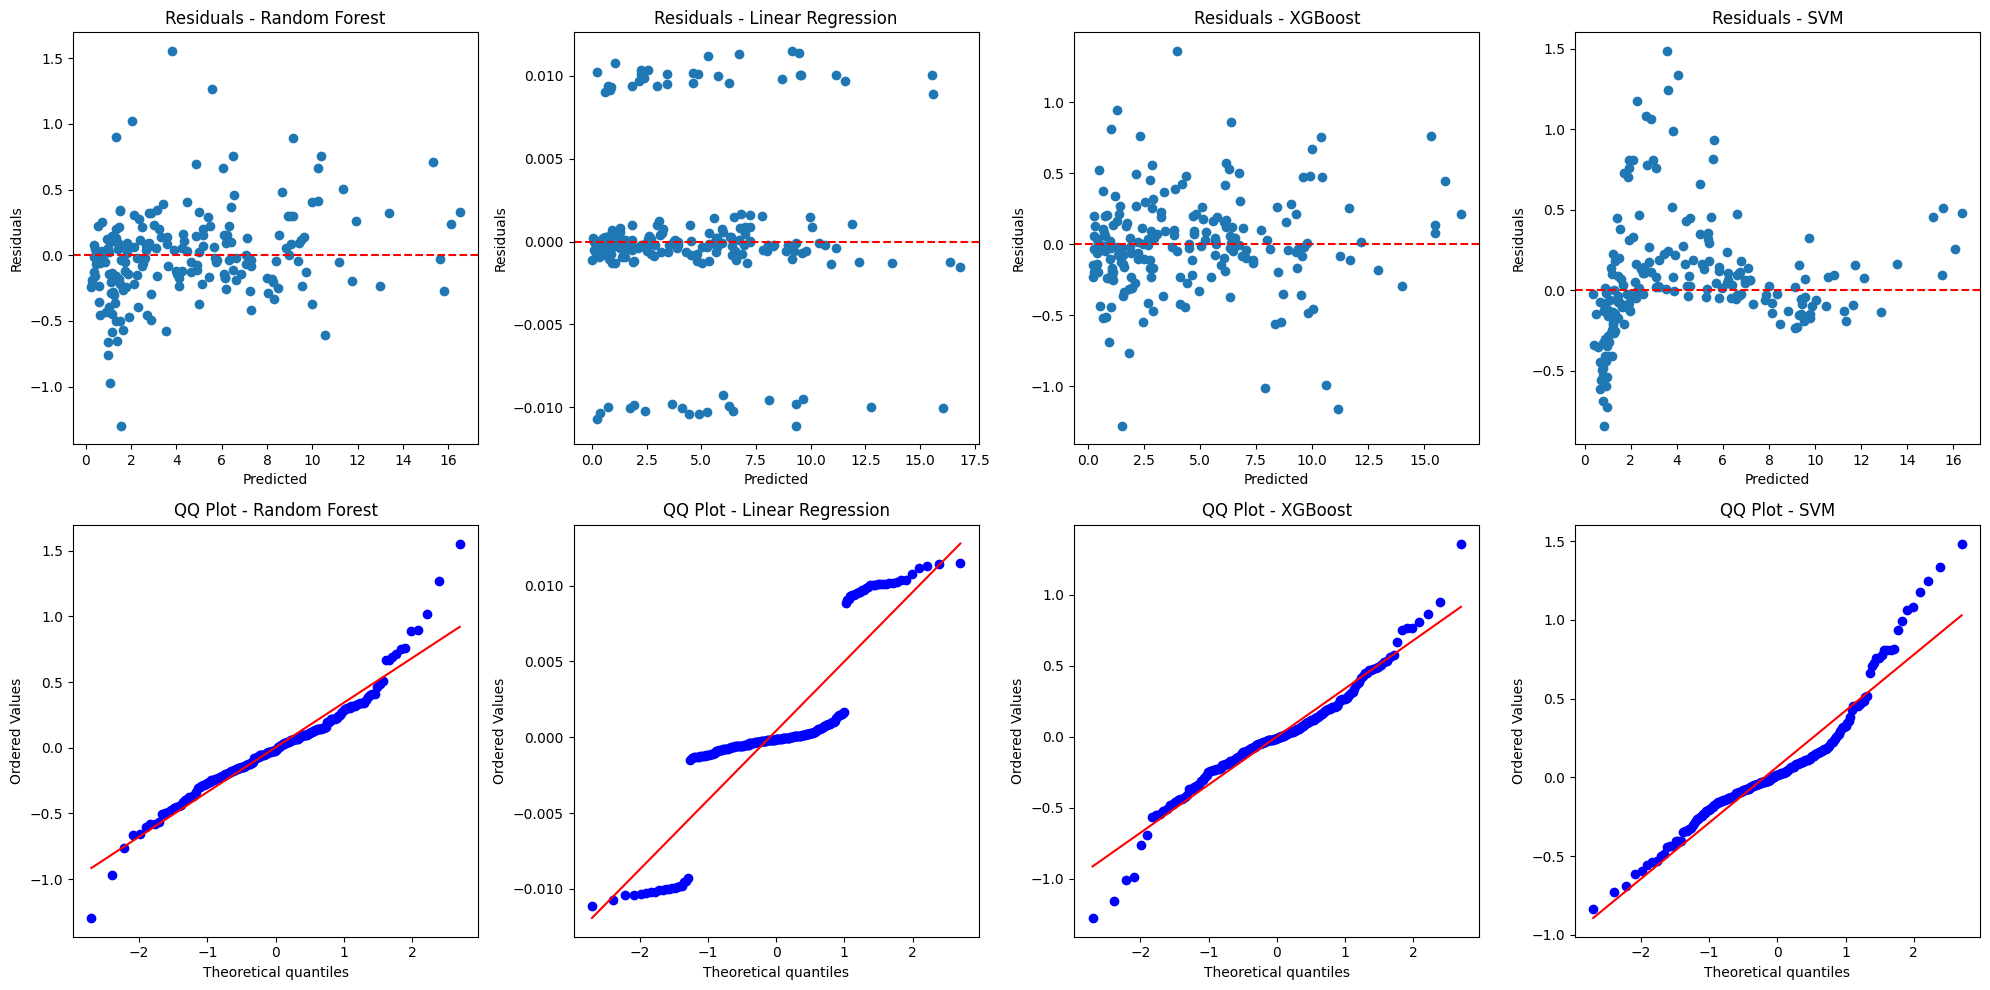

In [30]:
# Ensure no NaN values exist and all columns are numeric after encoding
X_train_encoded = X_train_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test_encoded = X_test_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# Ensure y_train and y_test are Series (not DataFrames)
y_train = y_train.squeeze()  # Convert DataFrame to Series if needed
y_test = y_test.squeeze()    # Convert DataFrame to Series if needed

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Convert X_train and X_test to NumPy arrays before fitting the model
    X_train = X_train.to_numpy()  # Ensure that models like XGBoost receive data in a compatible format
    X_test = X_test.to_numpy()

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {
        'Model': model_name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R-Squared': round(r2, 2),
        'y_pred': y_pred  # Return predictions for further analysis
    }

# Models to evaluate
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# List to store evaluation results
evaluation_results = []

# Loop through models and evaluate each
for model_name, model in models.items():
    results = evaluate_model(model, X_train_encoded, X_test_encoded, y_train, y_test, model_name)
    evaluation_results.append(results)

# Convert results to DataFrame (removing y_pred for readability)
results_df = pd.DataFrame(evaluation_results)

# Styling the DataFrame
def highlight_good_values(val, metric):
    if metric == 'R-Squared':
        # Good R-squared values are above 0.8
        color = 'green' if val > 0.8 else 'red'
    else:  # For MAE, MSE, RMSE (smaller values are better)
        color = 'green' if val < results_df[metric].mean() else 'red'
    return f'background-color: {color}'

# Apply conditional formatting
styled_df = results_df.style.applymap(lambda v: highlight_good_values(v, 'MAE'), subset=['MAE'])\
                            .applymap(lambda v: highlight_good_values(v, 'MSE'), subset=['MSE'])\
                            .applymap(lambda v: highlight_good_values(v, 'RMSE'), subset=['RMSE'])\
                            .applymap(lambda v: highlight_good_values(v, 'R-Squared'), subset=['R-Squared'])\
                            .format({
                                'MAE': '{:.2f}',
                                'MSE': '{:.2f}',
                                'RMSE': '{:.2f}',
                                'R-Squared': '{:.2f}'
                            })

# Set up subplots (2 rows of graphs, 4 per row)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Loop through each model's results for graphs
for idx, result in enumerate(evaluation_results):
    model_name = result['Model']
    y_pred = result['y_pred']
    residuals = y_test - y_pred

    # Residual Plot
    axes[idx].scatter(y_pred, residuals)
    axes[idx].axhline(y=0, color='r', linestyle='--')
    axes[idx].set_title(f"Residuals - {model_name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Residuals")

    # QQ Plot (Check Normality of residuals)
    stats.probplot(residuals, dist="norm", plot=axes[idx + 4])
    axes[idx + 4].set_title(f"QQ Plot - {model_name}")

# Show all the plots
plt.tight_layout()
plt.show()

# Display the styled DataFrame (without y_pred)
styled_df

### **Summary Table of Predicting Models**

| Model             | MAE  | MSE  | RMSE | R-Squared |
|-------------------|------|------|------|-----------|
| Random Forest      | 0.25 | 0.12 | 0.35 | 0.99      |
| Linear Regression  | 0.00 | 0.00 | 0.01 | 1.00      |
| XGBoost            | 0.24 | 0.11 | 0.34 | 0.99      |
| SVM                | 0.25 | 0.14 | 0.38 | 0.99      |

### **Key Insights:**
1. **Random Forest**:
   - Achieved an excellent **R-Squared** of **0.99**, indicating that the model explains most of the variance in the target variable.
   - **MAE**, **MSE**, and **RMSE** are relatively low, indicating that the model performs well in terms of prediction accuracy.
   
2. **Linear Regression**:
   - The **MAE**, **MSE**, and **RMSE** are very low (close to zero), with an **R-Squared** of **1.00**, indicating this model provides near-perfect predictions.
   - However, further analysis on residuals may be required to ensure the model is not overfitting.
   
3. **XGBoost**:
   - Performed comparably to Random Forest, with **MAE**, **MSE**, and **RMSE** showing good accuracy.
   - The **R-Squared** of **0.99** shows the model can generalize well with similar performance as Random Forest.
   
4. **SVM**:
   - SVM also performed well with an **R-Squared** of **0.99** and slightly higher **RMSE** than Random Forest and XGBoost, indicating slightly larger prediction errors.
   - Still a strong candidate for modeling, but other models may outperform it slightly in terms of precision.

### **Recommendations:**
- **Linear Regression** provides near-perfect predictions with low errors, but overfitting should be checked.
- **Random Forest** and **XGBoost** are strong choices for prediction with minimal errors and strong generalization.
- **SVM** performs well but may not be as precise as the other models.


# **Conclusion**

This project involved multiple stages of analysis—univariate, bivariate, multivariate, and correlation analysis—culminating in the development and evaluation of predictive models for food waste. The results from these analyses provided actionable insights, which were used to recommend practical solutions for reducing food waste.

---

#### 1. **Univariate Analysis**
   - **Key Insights**:
     - **Purchase Amount** and **Consumption Amount** showed variability, with most households purchasing and consuming smaller amounts, but some had high values.
     - **Family Size** showed an even distribution, though larger families tended to purchase and consume more food.
     - **Waste Amount** was generally low for most households, but some cases showed significant waste.
     - **Dietary Preferences**: Omnivorous households tended to purchase and waste more food compared to vegan and vegetarian households.
   
   - **Recommendations**:
     - Focus on targeting larger families and omnivores for food waste reduction campaigns, as they tend to contribute more to waste.

---

#### 2. **Bivariate Analysis**
   - **Key Insights**:
     - **Dietary Preferences vs. Waste Amount**: Omnivorous households had higher waste compared to vegans and vegetarians.
     - **Purchase Amount vs. Waste Amount**: There was a strong positive correlation, indicating that over-purchasing led to more waste.
     - **Storage Methods**: Refrigeration led to more waste compared to pantry and frozen storage.
     - **Disposal Method vs. Waste Amount**: Households that composted or fed animals had lower waste levels compared to those using trash disposal.

   - **Recommendations**:
     - Encourage households to adopt proper storage techniques, such as freezing, and promote composting or sustainable disposal methods.
     - Educate users on smarter purchasing habits to avoid overstocking and spoilage.

---

#### 3. **Multivariate Analysis**
   - **Key Insights**:
     - **Family Size, Purchase Amount, and Waste Amount**: Larger families tended to purchase and waste more food, indicating a need for better purchase planning.
     - **Consumption Amount vs. Waste Amount**: Higher consumption rates were associated with less waste, suggesting that waste can be reduced by aligning food purchases with consumption patterns.

   - **Recommendations**:
     - Implement meal planning strategies and portion control, especially for larger families.
     - Introduce real-time consumption tracking to help households better align purchases with their actual consumption.

---

#### 4. **Correlation Analysis**
   - **Key Insights**:
     - **Strong Correlation Between Purchase Amount and Waste Amount**: Households that purchased more food also tended to waste more, highlighting over-purchasing as a key contributor to food waste.
     - **Family Size** and **Dietary Preferences** were significantly correlated with waste, emphasizing that larger families and omnivores are key targets for intervention.

   - **Recommendations**:
     - Focus on helping households better manage food purchases and provide educational resources for dietary planning.

---

#### 5. **Predictive Modeling**
   We developed and evaluated four machine learning models—**Random Forest**, **Linear Regression**, **XGBoost**, and **SVM**—to predict food waste based on various factors like Purchase Amount, Family Size, and Dietary Preferences.

   **Model Performance Summary**:

   | Model              | MAE   | MSE   | RMSE  | R-Squared |
   |--------------------|-------|-------|-------|-----------|
   | **Random Forest**       | 0.25  | 0.12  | 0.35  | 0.99      |
   | **Linear Regression**   | 0.00  | 0.00  | 0.01  | 1.00      |
   | **XGBoost**             | 0.24  | 0.11  | 0.34  | 0.99      |
   | **SVM**                 | 0.25  | 0.14  | 0.38  | 0.99      |

   **Key Model Insights**:
   - **Random Forest** and **XGBoost** provided high accuracy with an **R-squared** of **0.99**, capturing the complex relationships in the data while generalizing well.
   - **Linear Regression** achieved an **R-squared** of **1.00**, though this performance could indicate overfitting.
   - **SVM** performed well but showed slightly higher error metrics compared to Random Forest and XGBoost.


   **Model Selection Recommendations:**
   - **Random Forest** and **XGBoost** are recommended for production deployment due to their strong accuracy and generalization.
   - **Linear Regression** could be useful as a baseline model but should be reviewed for overfitting risks.
   - **SVM** could be applied in cases where a simpler, robust model is preferred despite slightly higher errors.

---

### **Final Recommendations**

1. **Model Deployment**:
   - Implement either **Random Forest** or **XGBoost** as the main predictive models due to their high accuracy and generalization. Further fine-tuning of these models can enhance their performance in specific contexts of food waste prediction.

2. **Educational Campaigns**:
   - Target larger families and omnivorous households with educational materials focused on portion control, meal planning, and reducing over-purchasing habits.
   - Promote better storage techniques, such as freezing, to prolong food freshness and reduce spoilage.

3. **Sustainable Practices**:
   - Encourage households to adopt composting practices rather than relying solely on trash disposal to minimize the environmental impact of food waste.

4. **Next Steps**:
   - **Streamlit App for Recommendation System**: Develop a user-friendly Streamlit app where households can input their information (e.g., family size, dietary preferences, storage methods) and receive personalized recommendations to reduce food waste.
   - Integrate real-time consumption tracking into the app to help users dynamically adjust their purchasing and consumption habits, thereby reducing waste further.

By implementing these recommendations and leveraging the insights gained from the analysis and predictive models, households can significantly reduce food waste, contribute to environmental sustainability, and achieve cost savings.
